In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
import csv
import textwrap

import os, shutil
import numpy as np
import csv
import pandas as pd

import torch
#from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
from transformers import AutoTokenizer, AutoModel

In [2]:
import preprocess_for_context_atlas

/usr/local/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

device :  cpu


In [3]:
# initialize BERT model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device : ", device)

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()
model = model.to(device)



device :  cpu


### Choose the word we want to visualize

In [4]:
word = "human"

In [5]:
df = pd.read_csv('./data/logic_words/{}.csv'.format(word))
df.head(5)

,Unnamed: 0,corpus_id,sentence,start_idx,end_idx
0,0,18022704,"In level 1, ""A"", denotes the semantic class of...",13,14
1,1,18022704,"Accroding to human intuition, they simply refe...",2,3
2,2,16703040,"Second, because the thread source did not requ...",9,10
3,3,16703040,"7 With the RB corpus, the best performing sin...",24,25
4,4,16703040,"Finally, our classifier cannot out-perform hum...",21,22


In [6]:
sentences_w_word = df

# get setneces that are less than 150 in length
sentences_w_word[
    sentences_w_word["sentence"].apply(lambda x: len(x) > 150)
]

# Take at most 200 sentences.
sentences_w_word = sentences_w_word.sample(200)

# convert to list
sentences_w_word = sentences_w_word['sentence'].to_list()



In [7]:
# get the vectors
data = preprocess_for_context_atlas.neighbors(word, sentences_w_word)



Getting embeddings for 200 sentences 


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [8]:
sents = [label['sentence'] for label in data['labels'] ]
pos = [label['pos'] for label in data['labels'] ]

print(sents[:2])
print(pos[:2])

['To validate this approach and demonstrate the usefulness of the Twitter-COMMs dataset, we report results on human-generated test data, created to mimic real-world misinformation.', 'All study participants received a questionnaire containing the questions for evaluating grammatical correctness and understandability, and computer generated vs. human-authored.']
['X', 'X']


In [9]:
len(data['data'])

12

these are the layers. We select layer 7 (0 indexed)

In [15]:
points = data['data'][7]
points = np.array(points)
umap_x = points[:,0]
umap_y = points[:,1]

/var/folders/9m/vzvx58rs51v_x5nm620fz4xr0000gn/T/ipykernel_32264/1813579913.py:4: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



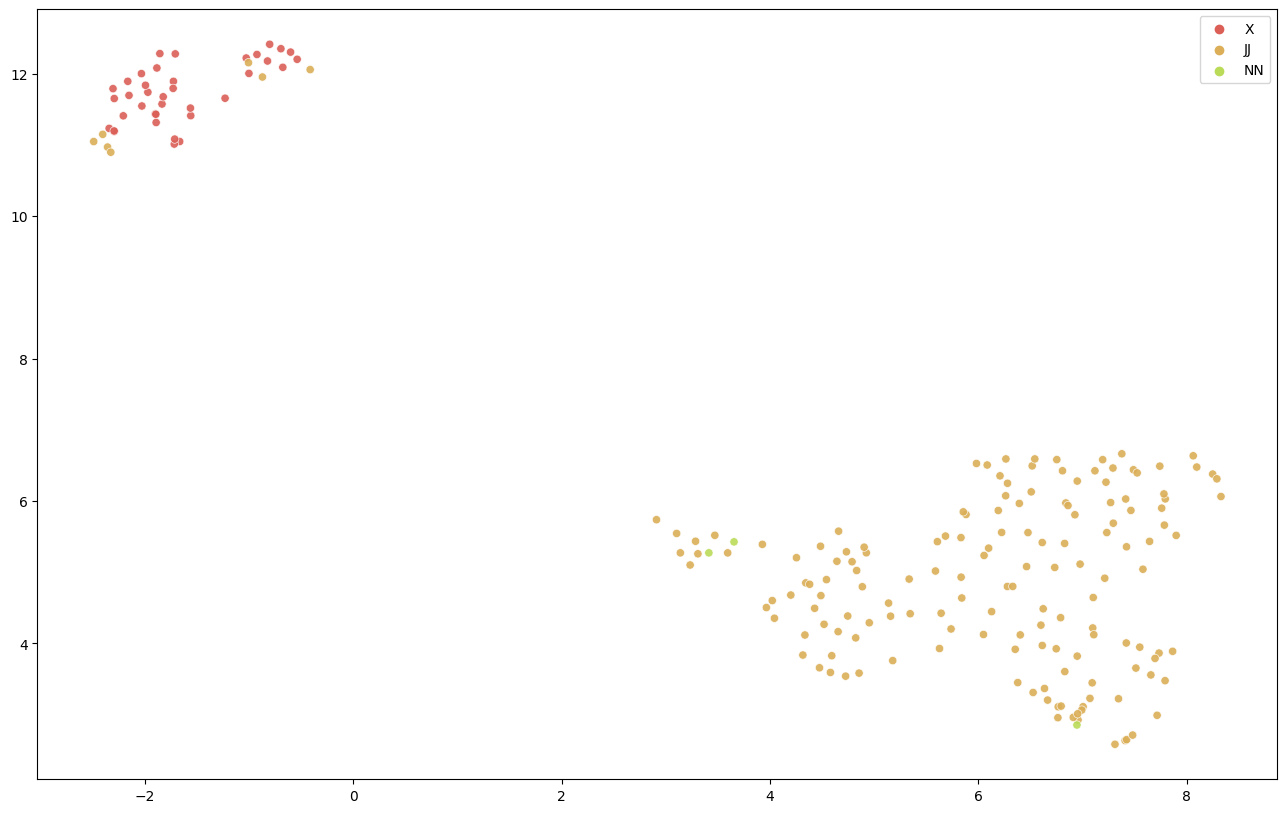

In [16]:
# get one with the indices annotated so we can pick out which sentence is where

plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x=umap_x, y=umap_y,
    hue=pos,
    palette=sns.color_palette("hls", 10),
    #data=df,
    legend="full",
    alpha=0.9
)

# for line in range(0,df.shape[0]):
#     if line % 1 == 0:
#         #text = df.context[line]
#         text = str(line)
#         text = textwrap.wrap(text, width=40)
#         text = '\n'.join(text)
#         p1.text(df["tsne-2d-one"][line]+0.2, df["tsne-2d-two"][line], text, horizontalalignment='left', size='medium', color='black', weight='semibold')


In [17]:
plot_dict = {"umap_x": umap_x,
             "umap_y": umap_y,
             "pos": pos,
             "sents": sents}
df = pd.DataFrame.from_records(plot_dict)
df.head(5)

,pos,sents,umap_x,umap_y
0,X,"To validate this approach and demonstrate the usefulness of the Twitter-COMMs dataset, we report results on human-generated test data, created to mimic real-world misinformation.",-2.207890,11.410645
1,X,"All study participants received a questionnaire containing the questions for evaluating grammatical correctness and understandability, and computer generated vs. human-authored.",-2.306653,11.792291
2,JJ,Our experiments show that our proposed method using Crosslingual Language Model (XLM) trained with a translation language modeling (TLM) objective achieves a higher correlation with human judgments than a baseline method that uses only hypothesis and reference sentences.,6.517257,6.492897
3,JJ,"Inspired by the human cognition, we propose the no-aspect template differential sentiment (NADS) framework.",7.794711,6.029203
4,JJ,"One may target the relevance level of the human summary (e.g., 61% for the 'one line' summary task from the broadcast news stories) for automatic summarisation research.",7.420481,4.004837


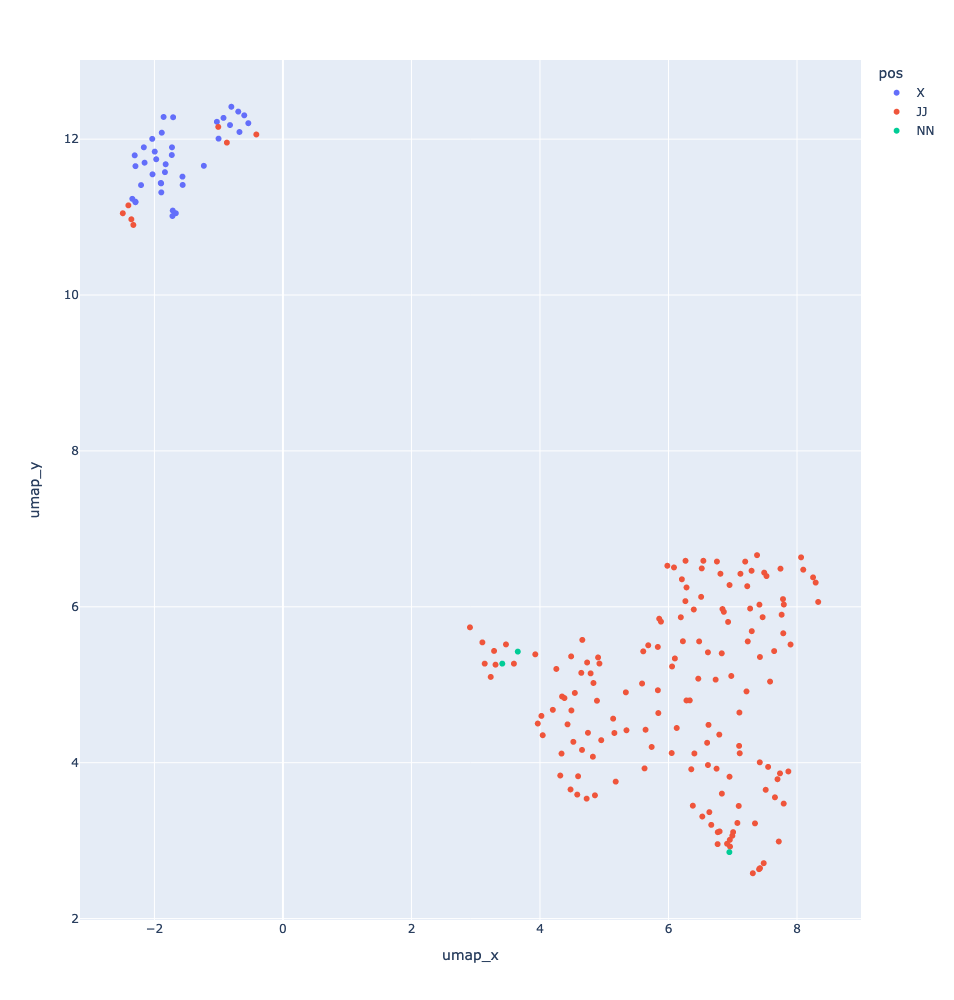

<Figure size 1600x1600 with 0 Axes>

In [18]:
plt.figure(figsize=(16,16))
#plt.figure(figsize=(16,10))

fig = px.scatter(df, x="umap_x", y="umap_y",
                 color="pos", 
                 hover_data="sents",
                 width=1000, height=1000
                )

fig.update_layout(hoverlabel={
    "align": "right",
    "bgcolor": "white"
})
fig.update_layout(hoverlabel_font={
    "size": 9,
    "color": "black"
})



fig.show()

In [19]:
pd.set_option('display.max_colwidth', None)
sents

['To validate this approach and demonstrate the usefulness of the Twitter-COMMs dataset, we report results on human-generated test data, created to mimic real-world misinformation.',
 'All study participants received a questionnaire containing the questions for evaluating grammatical correctness and understandability, and computer generated vs. human-authored.',
 'Our experiments show that our proposed method using Crosslingual Language Model (XLM) trained with a translation language modeling (TLM) objective achieves a higher correlation with human judgments than a baseline method that uses only hypothesis and reference sentences.',
 'Inspired by the human cognition, we propose the no-aspect template differential sentiment (NADS) framework.',
 "One may target the relevance level of the human summary (e.g., 61% for the 'one line' summary task from the broadcast news stories) for automatic summarisation research.",
 'As the number of references increases, the correlation with human ratin

### 